<a href="https://colab.research.google.com/github/anamilanezi/ebac-dados/blob/main/aulas/m13-data-wrangling-II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Aula**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Aulas**

## 0\. Estruturas de dados

*   **Não estruturado**: texto, imagem, aúdio, etc.
*   **Semi estruturado**: html, json, etc.
*   <font color='red'>**Estruturado**</font>: tabelas, planilhas, etc.



## 1\. Agregações e Ordenação

**Arquivo CSV:** github.csv

In [1]:
%%writefile github.csv
ranking;project;language;stars;stars_today;forks
1;plow;go;1304;574;38
2;n8n;typescript;15668;280;1370
3;slides;go;3218;265;80
4;defi-developer-road-map;;636;247;49
5;pytorch-image-models;python;11065;101;1646
6;javascript-algorithms;javascript;110768;248;18331
7;paddleclas;python;1429;283;323
8;reddit_sentiment_trader;python;369;71;60
9;augly;python;2849;393;99
10;self-taught-guide-to-cloud-computing;;863;179;84

Writing github.csv


**DataFrame:** github_df

In [2]:
import pandas as pd

github_df = pd.read_csv('github.csv', sep=';')

In [3]:
github_df

,ranking,project,language,stars,stars_today,forks
0,1,plow,go,1304,574,38
1,2,n8n,typescript,15668,280,1370
2,3,slides,go,3218,265,80
3,4,defi-developer-road-map,NaN,636,247,49
4,5,pytorch-image-models,python,11065,101,1646
5,6,javascript-algorithms,javascript,110768,248,18331
6,7,paddleclas,python,1429,283,323
7,8,reddit_sentiment_trader,python,369,71,60
8,9,augly,python,2849,393,99
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84


### **1.1. Agregações** 

Uma agregação é o processo de resumir um conjunto de dados através de uma métrica agregada, como soma, média, máximo, mínimo, etc.

**Exemplo**: Agregação de dados com o método `describe`.

In [4]:
describe_df = github_df[['ranking', 'stars', 'stars_today', 'forks']].describe().T # colunas numéricas

In [5]:
describe_df

,count,mean,std,min,25%,50%,75%,max
ranking,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
stars,10.0,14816.9,34100.448392,369.0,973.25,2139.0,9103.25,110768.0
stars_today,10.0,264.1,143.351510,71.0,196.00,256.5,282.25,574.0
forks,10.0,2208.0,5695.945615,38.0,65.00,91.5,1108.25,18331.0


In [6]:
describe_df.loc['stars', 'max']

110768.0

**Exemplo**: Agregação com o método `agg`.


In [7]:
sum_series = github_df[['stars', 'stars_today', 'forks']].agg('sum')

In [8]:
sum_series

stars          148169
stars_today      2641
forks           22080
dtype: int64

In [9]:
sum_series.loc['stars']

148169

**Exemplo**: Agregação com o método `agg` com múltiplas métricas.

In [10]:
mean_max_df = github_df[['stars', 'stars_today', 'forks']].agg(['mean', 'max'])

In [11]:
mean_max_df

,stars,stars_today,forks
mean,14816.9,264.1,2208.0
max,110768.0,574.0,18331.0


In [12]:
mean_max_df.loc['mean', 'stars']

14816.9

**Exemplo**: Agregação por grupos com os métodos `groupby` e `agg`.


In [13]:
grouped_sum_df = github_df[['language', 'stars', 'stars_today', 'forks']].groupby('language').agg('sum')

In [14]:
grouped_sum_df

,stars,stars_today,forks
language,,,
go,4522,839,118
javascript,110768,248,18331
python,15712,848,2128
typescript,15668,280,1370


In [15]:
grouped_sum_df.loc['python', 'stars']

15712

**Exemplo**: Agregação por grupos com os métodos `groupby` e `agg` com multiplas métricas.

In [16]:
grouped_count_sum_mean_std_df = github_df[['language', 'stars', 'stars_today', 'forks']].groupby('language').agg(['count', 'sum', 'mean', 'std'])

In [17]:
grouped_count_sum_mean_std_df

stars                                stars_today              \
           count     sum      mean          std       count  sum   mean   
language                                                                  
go             2    4522    2261.0  1353.402379           2  839  419.5   
javascript     1  110768  110768.0          NaN           1  248  248.0   
python         4   15712    3928.0  4865.267790           4  848  212.0   
typescript     1   15668   15668.0          NaN           1  280  280.0   

                       forks                              
                   std count    sum     mean         std  
language                                                  
go          218.495995     2    118     59.0   29.698485  
javascript         NaN     1  18331  18331.0         NaN  
python      152.756887     4   2128    532.0  751.653732  
typescript         NaN     1   1370   1370.0         NaN

In [18]:
grouped_count_sum_mean_std_df.loc['python', 'stars']

count        4.00000
sum      15712.00000
mean      3928.00000
std       4865.26779
Name: python, dtype: float64

In [19]:
grouped_count_sum_mean_std_df.loc['python', 'stars'].loc['sum']

15712.0

### **1.2. Ordenação** 

Uma ordenação é o processo de ordernar um conjunto de dados a partir de um conjunto de colunas e um critério (ascendente ou descendente). 

**Exemplo**: Ordernação com uma coluna de referência através do método `sort_values`.

In [20]:
github_df.sort_values(by=['stars'])

,ranking,project,language,stars,stars_today,forks
7,8,reddit_sentiment_trader,python,369,71,60
3,4,defi-developer-road-map,NaN,636,247,49
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84
0,1,plow,go,1304,574,38
6,7,paddleclas,python,1429,283,323
8,9,augly,python,2849,393,99
2,3,slides,go,3218,265,80
4,5,pytorch-image-models,python,11065,101,1646
1,2,n8n,typescript,15668,280,1370
5,6,javascript-algorithms,javascript,110768,248,18331


In [21]:
github_df.sort_values(by=['stars'], ascending=False)

,ranking,project,language,stars,stars_today,forks
5,6,javascript-algorithms,javascript,110768,248,18331
1,2,n8n,typescript,15668,280,1370
4,5,pytorch-image-models,python,11065,101,1646
2,3,slides,go,3218,265,80
8,9,augly,python,2849,393,99
6,7,paddleclas,python,1429,283,323
0,1,plow,go,1304,574,38
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84
3,4,defi-developer-road-map,NaN,636,247,49
7,8,reddit_sentiment_trader,python,369,71,60


**Exemplo**: Ordernação com um conjunto de colunas de referência através do método `sort_values`.

In [22]:
github_df.sort_values(by=['language', 'forks'], ascending=False)

,ranking,project,language,stars,stars_today,forks
1,2,n8n,typescript,15668,280,1370
4,5,pytorch-image-models,python,11065,101,1646
6,7,paddleclas,python,1429,283,323
8,9,augly,python,2849,393,99
7,8,reddit_sentiment_trader,python,369,71,60
5,6,javascript-algorithms,javascript,110768,248,18331
2,3,slides,go,3218,265,80
0,1,plow,go,1304,574,38
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84
3,4,defi-developer-road-map,NaN,636,247,49


**Exemplo**: Ordernação com a "coluna" de indices como referência através do método `sort_index`.

In [23]:
github_df.sort_index()

,ranking,project,language,stars,stars_today,forks
0,1,plow,go,1304,574,38
1,2,n8n,typescript,15668,280,1370
2,3,slides,go,3218,265,80
3,4,defi-developer-road-map,NaN,636,247,49
4,5,pytorch-image-models,python,11065,101,1646
5,6,javascript-algorithms,javascript,110768,248,18331
6,7,paddleclas,python,1429,283,323
7,8,reddit_sentiment_trader,python,369,71,60
8,9,augly,python,2849,393,99
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84


In [24]:
github_df.sort_index(ascending=False)

,ranking,project,language,stars,stars_today,forks
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84
8,9,augly,python,2849,393,99
7,8,reddit_sentiment_trader,python,369,71,60
6,7,paddleclas,python,1429,283,323
5,6,javascript-algorithms,javascript,110768,248,18331
4,5,pytorch-image-models,python,11065,101,1646
3,4,defi-developer-road-map,NaN,636,247,49
2,3,slides,go,3218,265,80
1,2,n8n,typescript,15668,280,1370
0,1,plow,go,1304,574,38


## 2\. Combinação

### **2.1. Método `concat`** 

Combina dataframes baseado nas **linhas**, de maneira simples, **sem lógica de combinação**.

In [25]:
primeiros_5 = github_df.query('ranking <= 5')

In [26]:
primeiros_5

,ranking,project,language,stars,stars_today,forks
0,1,plow,go,1304,574,38
1,2,n8n,typescript,15668,280,1370
2,3,slides,go,3218,265,80
3,4,defi-developer-road-map,NaN,636,247,49
4,5,pytorch-image-models,python,11065,101,1646


In [29]:
ultimos_5 = github_df.query('ranking > 5')

In [30]:
ultimos_5

,ranking,project,language,stars,stars_today,forks
5,6,javascript-algorithms,javascript,110768,248,18331
6,7,paddleclas,python,1429,283,323
7,8,reddit_sentiment_trader,python,369,71,60
8,9,augly,python,2849,393,99
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84


*   **Exemplo**: Concatenação com colunas iguais:

In [31]:
pd.concat([primeiros_5, ultimos_5])

,ranking,project,language,stars,stars_today,forks
0,1,plow,go,1304,574,38
1,2,n8n,typescript,15668,280,1370
2,3,slides,go,3218,265,80
3,4,defi-developer-road-map,NaN,636,247,49
4,5,pytorch-image-models,python,11065,101,1646
5,6,javascript-algorithms,javascript,110768,248,18331
6,7,paddleclas,python,1429,283,323
7,8,reddit_sentiment_trader,python,369,71,60
8,9,augly,python,2849,393,99
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84


In [32]:
pd.concat([ultimos_5, primeiros_5])

,ranking,project,language,stars,stars_today,forks
5,6,javascript-algorithms,javascript,110768,248,18331
6,7,paddleclas,python,1429,283,323
7,8,reddit_sentiment_trader,python,369,71,60
8,9,augly,python,2849,393,99
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84
0,1,plow,go,1304,574,38
1,2,n8n,typescript,15668,280,1370
2,3,slides,go,3218,265,80
3,4,defi-developer-road-map,NaN,636,247,49
4,5,pytorch-image-models,python,11065,101,1646


*   **Exemplo**: Concatenação com colunas diferentes:

In [33]:
pd.concat([primeiros_5[['ranking', 'stars']], ultimos_5[['ranking', 'language']]])

,ranking,stars,language
0,1,1304.0,NaN
1,2,15668.0,NaN
2,3,3218.0,NaN
3,4,636.0,NaN
4,5,11065.0,NaN
5,6,NaN,javascript
6,7,NaN,python
7,8,NaN,python
8,9,NaN,python
9,10,NaN,NaN


### **2.2. Método `merge`** 

Combina dataframes baseado em **colunas**, com **lógica de combinação**.

In [34]:
linguagem_df = pd.DataFrame({
    'language': ['c', 'go', 'python', 'javascript', 'typescript'], 
    'creation_year': [1972, 2009, 1991, 1995, 2012], 
    'paradigm': ['imperative', 'imperative', 'imperative, object-oriented', 'imperative, object-oriented', 'imperative, object-oriented']
})

In [35]:
linguagem_df

,language,creation_year,paradigm
0,c,1972,imperative
1,go,2009,imperative
2,python,1991,"imperative, object-oriented"
3,javascript,1995,"imperative, object-oriented"
4,typescript,2012,"imperative, object-oriented"


*   **Exemplo**: Combinação do tipo `inner`:

In [36]:
pd.merge(left=github_df, right=linguagem_df, on='language', how='inner')

,ranking,project,language,stars,stars_today,forks,creation_year,paradigm
0,1,plow,go,1304,574,38,2009,imperative
1,3,slides,go,3218,265,80,2009,imperative
2,2,n8n,typescript,15668,280,1370,2012,"imperative, object-oriented"
3,5,pytorch-image-models,python,11065,101,1646,1991,"imperative, object-oriented"
4,7,paddleclas,python,1429,283,323,1991,"imperative, object-oriented"
5,8,reddit_sentiment_trader,python,369,71,60,1991,"imperative, object-oriented"
6,9,augly,python,2849,393,99,1991,"imperative, object-oriented"
7,6,javascript-algorithms,javascript,110768,248,18331,1995,"imperative, object-oriented"


*   **Exemplo**: Combinação do tipo `left` e `right`:

In [37]:
pd.merge(left=github_df, right=linguagem_df, on='language', how='left')

,ranking,project,language,stars,stars_today,forks,creation_year,paradigm
0,1,plow,go,1304,574,38,2009.0,imperative
1,2,n8n,typescript,15668,280,1370,2012.0,"imperative, object-oriented"
2,3,slides,go,3218,265,80,2009.0,imperative
3,4,defi-developer-road-map,NaN,636,247,49,NaN,NaN
4,5,pytorch-image-models,python,11065,101,1646,1991.0,"imperative, object-oriented"
5,6,javascript-algorithms,javascript,110768,248,18331,1995.0,"imperative, object-oriented"
6,7,paddleclas,python,1429,283,323,1991.0,"imperative, object-oriented"
7,8,reddit_sentiment_trader,python,369,71,60,1991.0,"imperative, object-oriented"
8,9,augly,python,2849,393,99,1991.0,"imperative, object-oriented"
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84,NaN,NaN


In [38]:
pd.merge(left=github_df, right=linguagem_df, on='language', how='right')

,ranking,project,language,stars,stars_today,forks,creation_year,paradigm
0,NaN,NaN,c,NaN,NaN,NaN,1972,imperative
1,1.0,plow,go,1304.0,574.0,38.0,2009,imperative
2,3.0,slides,go,3218.0,265.0,80.0,2009,imperative
3,5.0,pytorch-image-models,python,11065.0,101.0,1646.0,1991,"imperative, object-oriented"
4,7.0,paddleclas,python,1429.0,283.0,323.0,1991,"imperative, object-oriented"
5,8.0,reddit_sentiment_trader,python,369.0,71.0,60.0,1991,"imperative, object-oriented"
6,9.0,augly,python,2849.0,393.0,99.0,1991,"imperative, object-oriented"
7,6.0,javascript-algorithms,javascript,110768.0,248.0,18331.0,1995,"imperative, object-oriented"
8,2.0,n8n,typescript,15668.0,280.0,1370.0,2012,"imperative, object-oriented"


*   **Exemplo**: Combinação do tipo `outer`:

In [39]:
pd.merge(left=github_df, right=linguagem_df, on='language', how='outer')

,ranking,project,language,stars,stars_today,forks,creation_year,paradigm
0,1.0,plow,go,1304.0,574.0,38.0,2009.0,imperative
1,3.0,slides,go,3218.0,265.0,80.0,2009.0,imperative
2,2.0,n8n,typescript,15668.0,280.0,1370.0,2012.0,"imperative, object-oriented"
3,4.0,defi-developer-road-map,NaN,636.0,247.0,49.0,NaN,NaN
4,10.0,self-taught-guide-to-cloud-computing,NaN,863.0,179.0,84.0,NaN,NaN
5,5.0,pytorch-image-models,python,11065.0,101.0,1646.0,1991.0,"imperative, object-oriented"
6,7.0,paddleclas,python,1429.0,283.0,323.0,1991.0,"imperative, object-oriented"
7,8.0,reddit_sentiment_trader,python,369.0,71.0,60.0,1991.0,"imperative, object-oriented"
8,9.0,augly,python,2849.0,393.0,99.0,1991.0,"imperative, object-oriented"
9,6.0,javascript-algorithms,javascript,110768.0,248.0,18331.0,1995.0,"imperative, object-oriented"


## 3\. Técnicas Avançadas

### **3.1. Gráficos** 

O Pandas possuí o método `plot` ([documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)) para a geração de gráficos a partir de DataFrames. Por padrão, utiliza o pacote Python de geração de gráficos **MatplotLib** ([documentação](https://matplotlib.org/stable/index.html)).

#### 3.1.1 Pizza 

Gráfico que relaciona uma variável **categórica** com uma variável **numérica**. Vamos utilizar o método `pie` ([documentação](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)) do pacote MatplotLib.

*   **Exemplo**: Proporção das linguagens de programação no ranking:

In [ ]:
{'amount': len(github_df)*[1]}

In [41]:
languages_df = pd.concat([github_df[['language']], pd.DataFrame({'amount': len(github_df)*[1]})], axis=1)

In [42]:
languages_df

,language,amount
0,go,1
1,typescript,1
2,go,1
3,NaN,1
4,python,1
5,javascript,1
6,python,1
7,python,1
8,python,1
9,NaN,1


In [43]:
grouped_languages_df = languages_df.groupby('language').agg('sum')

In [44]:
grouped_languages_df

,amount
language,
go,2
javascript,1
python,4
typescript,1


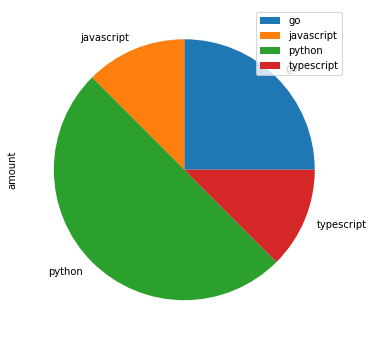

In [45]:
grouped_languages_df.plot.pie(y='amount', figsize=(11, 6))

#### 3.1.2 Pontos 

Gráfico que relaciona variáveis **numéricas**. Vamos utilizar o método `scatter` ([documentação](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)) do pacote MatplotLib.

*   **Exemplo**: Relação entre o número de `stars` com o `forks`:

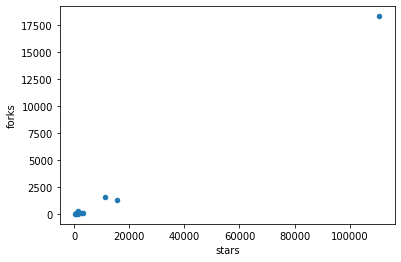

In [67]:
github_df.plot.scatter(x='stars', y='forks')

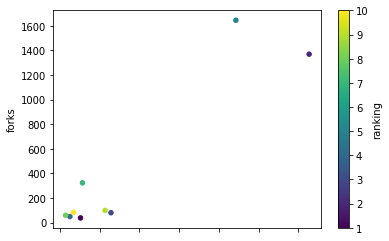

In [68]:
github_df.query('stars < 100000').plot.scatter(x='stars', y='forks', c='ranking', colormap='viridis')

### **3.2. Valores Nulos** 

Valores nulos em um DataFrame Pandas ocorrem quando o pacote não consegue interpretar o dado da fonte de dados, exemplos:

*   Colunas categóricas com valores vazios (` `);
*   Colunas numéricas com valores nulos (`None`);
*   etc.



#### 3.2.1 Identificação

*   **Exemplo**: Identificaçao de linhas com algum valor nulo com os métodos `isnull` e `any`:

In [69]:
github_df

,ranking,project,language,stars,stars_today,forks
0,1,plow,go,1304,574,38
1,2,n8n,typescript,15668,280,1370
2,3,slides,go,3218,265,80
3,4,defi-developer-road-map,NaN,636,247,49
4,5,pytorch-image-models,python,11065,101,1646
5,6,javascript-algorithms,javascript,110768,248,18331
6,7,paddleclas,python,1429,283,323
7,8,reddit_sentiment_trader,python,369,71,60
8,9,augly,python,2849,393,99
9,10,self-taught-guide-to-cloud-computing,NaN,863,179,84


In [70]:
github_df.isnull()

,ranking,project,language,stars,stars_today,forks
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,True,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,True,False,False,False


In [71]:
github_df.isnull().any()

ranking        False
project        False
language        True
stars          False
stars_today    False
forks          False
dtype: bool

In [72]:
github_df.isnull().any().any()

True

In [73]:
def has_null(df: pd.DataFrame) -> bool:
  return df.isnull().any().any()

In [74]:
has_null(df=github_df)

True

#### 3.2.2 Remoção 

*   **Exemplo**: Remoção de linhas com algum valor nulo com o método `dropna`:

In [75]:
github_df.dropna()

,ranking,project,language,stars,stars_today,forks
0,1,plow,go,1304,574,38
1,2,n8n,typescript,15668,280,1370
2,3,slides,go,3218,265,80
4,5,pytorch-image-models,python,11065,101,1646
5,6,javascript-algorithms,javascript,110768,248,18331
6,7,paddleclas,python,1429,283,323
7,8,reddit_sentiment_trader,python,369,71,60
8,9,augly,python,2849,393,99


In [76]:
has_null(df=github_df.dropna())

False

#### 3.2.3 Preenchimento 

*   **Exemplo**: Preenchimento valores nulos com o método `fillna`:

In [77]:
github_df.fillna('')

,ranking,project,language,stars,stars_today,forks
0,1,plow,go,1304,574,38
1,2,n8n,typescript,15668,280,1370
2,3,slides,go,3218,265,80
3,4,defi-developer-road-map,,636,247,49
4,5,pytorch-image-models,python,11065,101,1646
5,6,javascript-algorithms,javascript,110768,248,18331
6,7,paddleclas,python,1429,283,323
7,8,reddit_sentiment_trader,python,369,71,60
8,9,augly,python,2849,393,99
9,10,self-taught-guide-to-cloud-computing,,863,179,84


In [78]:
has_null(df=github_df.fillna(''))

False